In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

In [2]:
X, y = make_classification(n_samples=100000,n_features=2,n_classes=2,n_informative=2,n_redundant=0,n_repeated=0,n_clusters_per_class=1,weights=[0.995,0.005],class_sep=0.5,random_state=42)

In [3]:
X = pd.DataFrame(X, columns=['feature_1','feature_2'])
X.head()

,feature_1,feature_2
0,0.204960,-0.833321
1,0.075509,-0.979771
2,-0.889821,-2.032022
3,0.750861,-0.222289
4,0.799499,-0.160389


In [4]:
y = pd.Series(y)
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [5]:
y.value_counts()

0    99021
1      979
Name: count, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [7]:
model = OneClassSVM(nu=0.01,kernel='rbf',gamma='scale')
model.fit(X_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,nu,0.01
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [8]:
y_predict = model.predict(X_test)
y_predict = np.where(y_predict == 1,0,1)
y_predict

array([0, 0, 0, ..., 0, 0, 0], shape=(30000,))

In [9]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.6511094439795713
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29706
           1       0.30      0.31      0.30       294

    accuracy                           0.99     30000
   macro avg       0.64      0.65      0.65     30000
weighted avg       0.99      0.99      0.99     30000



In [10]:
score = model.score_samples(X_test)
score

array([143.45913892, 142.7738445 , 143.14545561, ..., 142.84028628,
       141.90769942, 141.74162008], shape=(30000,))

In [11]:
threshold = np.quantile(score,0.02)
threshold

np.float64(141.72900761766724)

In [12]:
score = np.where(score > threshold,0,1)
score

array([0, 0, 0, ..., 0, 0, 0], shape=(30000,))

In [13]:
print(balanced_accuracy_score(y_test,score))
print(classification_report(y_test,score))

0.6564996832908078
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     29706
           1       0.16      0.33      0.22       294

    accuracy                           0.98     30000
   macro avg       0.58      0.66      0.60     30000
weighted avg       0.99      0.98      0.98     30000



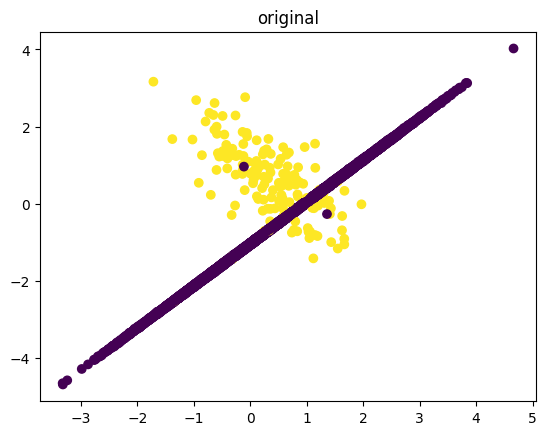

In [22]:
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=y_test)
plt.title('original')
plt.show()

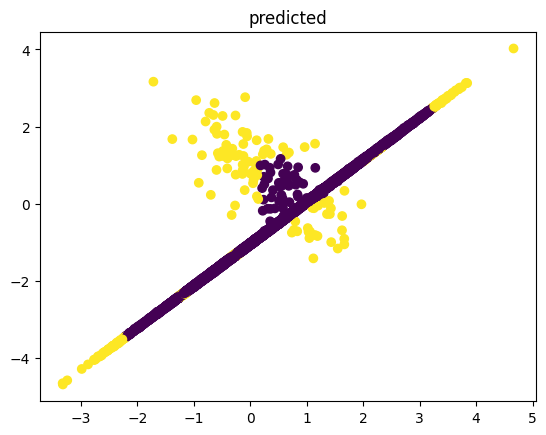

In [23]:
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=y_predict)
plt.title('predicted')
plt.show()

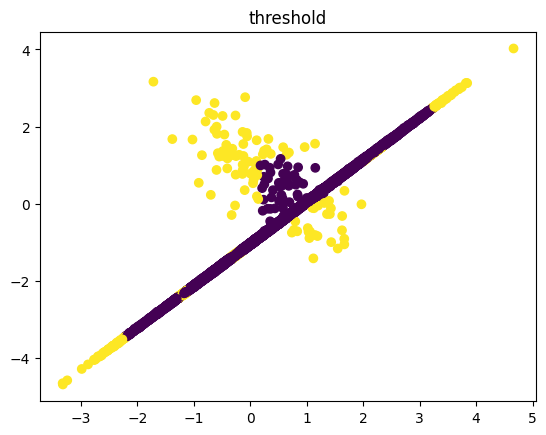

In [24]:
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=score)
plt.title('threshold')
plt.show()